In [1]:
#import the necessary libraries for time series data handling and modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


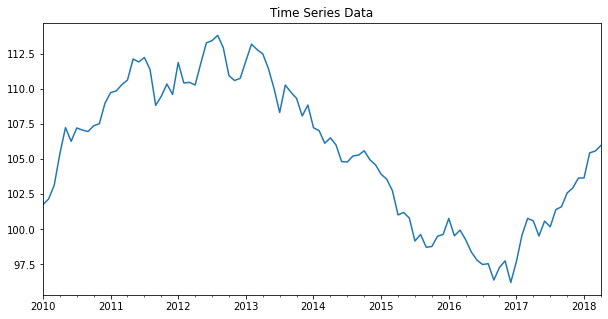

In [2]:
# Generate a sample time series data (or load your dataset)
dates = pd.date_range(start='2010-01-01', periods=100, freq='M')
np.random.seed(0)
data = np.cumsum(np.random.randn(100)) + 100  # Example of a random walk
df = pd.DataFrame(data, columns=['value'], index=dates)

# Plot the time series
df['value'].plot(figsize=(10, 5))
plt.title('Time Series Data')
plt.show()


## Check for Stationarity: Use the ADF test (Augmented Dickey-Fuller) to check whether the time series is stationary. A non-stationary series might need differencing.

In [3]:
result = adfuller(df['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation: If the p-value is less than 0.05, the data is stationary.


ADF Statistic: -1.1320384625097908
p-value: 0.702127738589838


In [4]:
## If the time series is not stationary, apply differencing
df['diff'] = df['value'].diff().dropna()


### Fit the SARIMAX Model
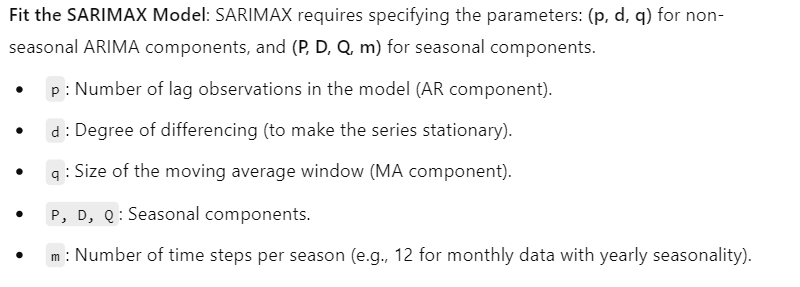

In [5]:
# Define the SARIMAX model (p, d, q) x (P, D, Q, m)
model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarimax_model = model.fit(disp=False)

# Print the model summary
print(sarimax_model.summary())


C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -132.907
Date:                            Fri, 13 Sep 2024   AIC                            275.813
Time:                                    14:05:23   BIC                            288.143
Sample:                                01-31-2010   HQIC                           280.778
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9830      0.128      7.659      0.000       0.731       1.234
ma.L1         -0.9136      0.109   

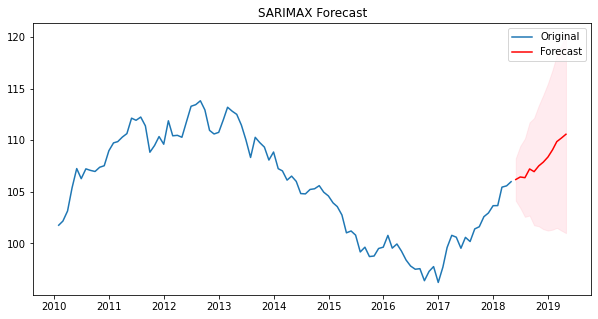

In [6]:
# Forecast the next 12 time steps
forecast = sarimax_model.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df['value'], label='Original')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.591
Date:                            Fri, 13 Sep 2024   AIC                            279.181
Time:                                    14:17:50   BIC                            293.977
Sample:                                01-31-2010   HQIC                           285.139
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ad_spend      -0.0010      0.001     -1.263      0.207      -0.002       0.001
ar.L1          0.0813      2.044   

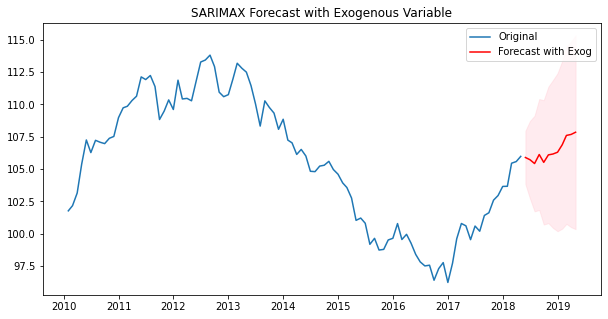

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generate a sample time series data
dates = pd.date_range(start='2010-01-01', periods=100, freq='M')
np.random.seed(0)
data = np.cumsum(np.random.randn(100)) + 100  # Random walk example
df = pd.DataFrame(data, columns=['value'], index=dates)

# Add exogenous variable (ad spend)
np.random.seed(42)
ad_spend = np.random.uniform(200, 500, size=len(df))  # Example ad spend data
df['ad_spend'] = ad_spend

# Define SARIMAX model with exogenous variable
model_with_exog = SARIMAX(df['value'], 
                          order=(1, 1, 1), 
                          seasonal_order=(1, 1, 1, 12), 
                          exog=df[['ad_spend']])

# Fit the model
sarimax_exog_model = model_with_exog.fit(disp=False)

# Print model summary
print(sarimax_exog_model.summary())

# Create future exogenous variable for forecast (next 12 months)
future_exog = np.random.uniform(200, 500, size=12)

# Forecast the next 12 time steps
forecast_with_exog = sarimax_exog_model.get_forecast(steps=12, exog=future_exog.reshape(-1, 1))
forecast_values_exog = forecast_with_exog.predicted_mean
conf_int_exog = forecast_with_exog.conf_int()

# Plot forecast with exogenous variable
plt.figure(figsize=(10, 5))
plt.plot(df['value'], label='Original')
plt.plot(forecast_values_exog.index, forecast_values_exog, label='Forecast with Exog', color='red')
plt.fill_between(forecast_values_exog.index, conf_int_exog.iloc[:, 0], conf_int_exog.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast with Exogenous Variable')
plt.legend()
plt.show()




In [13]:
# Create future exogenous values for the forecast (12 months ahead)
future_exog = np.random.uniform(200, 500, size=12)

# Ensure the exog data is reshaped as expected (12, 1)
future_exog = future_exog.reshape(-1, 1)

# Forecast the next 12 time steps using the future exogenous variable
forecast_with_exog = sarimax_exog_model.get_forecast(steps=12, exog=future_exog)
forecast_values_exog = forecast_with_exog.predicted_mean


In [14]:
forecast_values_exog

2018-05-31    105.634258
2018-06-30    105.675322
2018-07-31    105.334010
2018-08-31    106.021028
2018-09-30    105.547179
2018-10-31    106.115345
2018-11-30    106.023134
2018-12-31    106.365191
2019-01-31    106.710122
2019-02-28    107.365463
2019-03-31    107.671045
2019-04-30    107.865050
Freq: M, Name: predicted_mean, dtype: float64